# Data preprocessing

In [8]:
import csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score, explained_variance_score

data = []
scaler = MinMaxScaler()

def create_dataset(dataset, look_back=12):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        aux = dataset[i:(i+look_back)]
        dataX.append(aux)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

def get_average(row, col, data):
    sum = 0
    for i in range(row-12, row, 1):
        sum+=data[i][col]
    return sum/12


def remove_missing_values(data):
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == 0:
                data[i][j] = get_average(i, j, data)


with open('./datasets/traffic-prediction-dataset.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        row_to_append = [float(x) for x in row[0:4]]
        data.append(row_to_append)

remove_missing_values(data)

307
308
309
310
311
312
313
314
315
316
317
318
309
310
311
312
313
314
315
316
317
318
319
320
323
324
325
326
327
328
329
330
331
332
333
334
326
327
328
329
330
331
332
333
334
335
336
337
329
330
331
332
333
334
335
336
337
338
339
340
330
331
332
333
334
335
336
337
338
339
340
341
330
331
332
333
334
335
336
337
338
339
340
341
332
333
334
335
336
337
338
339
340
341
342
343
333
334
335
336
337
338
339
340
341
342
343
344
334
335
336
337
338
339
340
341
342
343
344
345
410
411
412
413
414
415
416
417
418
419
420
421
411
412
413
414
415
416
417
418
419
420
421
422
412
413
414
415
416
417
418
419
420
421
422
423
413
414
415
416
417
418
419
420
421
422
423
424
414
415
416
417
418
419
420
421
422
423
424
425
415
416
417
418
419
420
421
422
423
424
425
426
416
417
418
419
420
421
422
423
424
425
426
427
417
418
419
420
421
422
423
424
425
426
427
428
418
419
420
421
422
423
424
425
426
427
428
429
419
420
421
422
423
424
425
426
427
428
429
430
420
421
422
423
424
425
426
427
428
429


In [3]:
scaler.fit(data)
normalized_data = scaler.transform(data)

[0.29787234 0.1589404  0.13761468 0.19871795]
[0.2751773  0.13576159 0.14678899 0.17628205]
[0.21560284 0.15562914 0.20183486 0.18589744]
[0.27801418 0.13245033 0.17889908 0.18910256]
[0.24680851 0.13576159 0.21559633 0.15705128]
[0.22695035 0.13245033 0.16055046 0.20192308]
[0.26099291 0.15231788 0.17889908 0.18589744]
[0.22695035 0.10264901 0.09633028 0.14423077]
[0.25815603 0.18211921 0.16055046 0.1474359 ]
[0.21276596 0.13907285 0.11926606 0.24679487]
[0.13617021 0.0794702  0.06880734 0.12179487]
[0.17304965 0.10264901 0.07798165 0.10576923]
[0.17021277 0.10596026 0.10550459 0.16987179]
[0.16737589 0.08278146 0.10091743 0.08974359]
[0.11914894 0.03311258 0.06422018 0.08653846]
[0.15602837 0.0794702  0.11009174 0.09935897]
[0.10780142 0.04966887 0.11926606 0.1025641 ]
[0.11914894 0.08609272 0.08256881 0.09294872]
[0.13333333 0.08940397 0.06880734 0.15064103]
[0.10212766 0.04966887 0.0733945  0.09615385]
[0.10496454 0.04635762 0.05045872 0.08974359]
[0.0964539  0.05960265 0.02752294 

# Train and Test Sets

In [2]:
train_size = int(len(normalized_data) * 0.75)
test_size = len(normalized_data) - train_size

train, test = normalized_data[0:train_size,:], normalized_data[train_size:len(normalized_data),:]
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)
y_real = scaler.inverse_transform(y_test)

# Recurrent Neural Networks

In [3]:
train_rnn_size = int(len(x_train)*0.95)

x_train_rnn, y_train_rnn = x_train[0:train_rnn_size,:], y_train[0:train_rnn_size,:]
x_val_rnn, y_val_rnn = x_train[train_rnn_size:len(x_train),:], y_train[train_rnn_size:len(y_train),:]

## Training LSTM-NN

In [16]:
from keras import Input
from keras.models import Sequential 
from keras.layers import Dense, Dropout, InputLayer
from keras.layers import LSTM
from keras.callbacks import History 

history_lstm = History()


lstm_model = Sequential()
lstm_model.add(InputLayer(input_shape=(12, 4)))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(4))
lstm_model.compile(loss='mean_squared_error', optimizer='rmsprop')
lstm_model.summary()

lstm_model.fit(x_train_rnn, y_train_rnn, epochs=50, batch_size=128, validation_data=(x_val_rnn, y_val_rnn), callbacks=[history_lstm])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            17664     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 50,948
Trainable params: 50,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
90/90 [==============================] - 4s 21ms/step - loss: 0.0087 - val_loss: 0.0055
Epoch 2/50
90/90 [==============================] - 1s 17ms/step - loss: 0.0048 - v

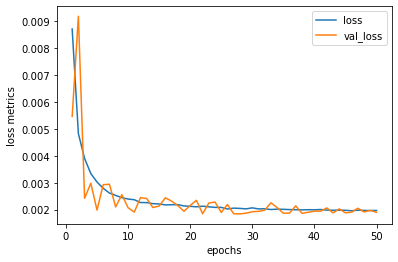

In [34]:
import matplotlib.pyplot as plt

epochs = [i+1 for i in range(50)]
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

plt.plot(epochs, loss_lstm)
plt.plot(epochs, val_loss_lstm)
plt.xlabel("epochs")
plt.ylabel("loss metrics")
plt.legend(['loss', 'val_loss'])
plt.savefig("loss_lstm.jpg")

## Testing LSTM-NN

In [25]:
y_pred_lstm = lstm_model.predict(x_test)

y_real_pred_lstm = scaler.inverse_transform(y_pred_lstm)
 
print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_lstm))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_lstm))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_lstm, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_lstm))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_lstm))

126/126 [==============================] - 1s 5ms/step
Mean Absolute error: 10.825328745745061
Mean Absolute Percentage error: 921925219624300.1
Mean Squared error: 15.833685012283713
R-Squared score: 0.9300004819342713
Explained Variance score: 0.9307716447480484


## Training GRU-NN

In [35]:
from keras.layers import GRU

history_gru = History()

gru_model = Sequential()
gru_model.add(InputLayer(input_shape=(12, 4)))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(4))
gru_model.compile(loss='mean_squared_error', optimizer='rmsprop')
gru_model.summary()

gru_model.fit(x_train_rnn, y_train_rnn, epochs=50, batch_size=128, validation_data=(x_val_rnn, y_val_rnn), callbacks=[history_gru])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 12, 64)            13440     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 38,660
Trainable params: 38,660
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
90/90 [==============================] - 4s 20ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 2/50
90/90 [==============================] - 1s 15ms/step - loss: 0.0034 - v

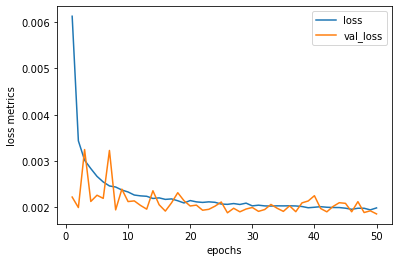

In [36]:
epochs = [i+1 for i in range(50)]
loss_gru = history_gru.history['loss']
val_loss_gru = history_gru.history['val_loss']

plt.plot(epochs, loss_gru)
plt.plot(epochs, val_loss_gru)
plt.xlabel("epochs")
plt.ylabel("loss metrics")
plt.legend(['loss', 'val_loss'])
plt.savefig("loss_gru.jpg")

## Testing GRU-NN

In [30]:
y_pred_gru = gru_model.predict(x_test)

y_real_pred_gru = scaler.inverse_transform(y_pred_gru)
 
print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_gru))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_gru))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_gru, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_gru))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_gru))

126/126 [==============================] - 1s 5ms/step
Mean Absolute error: 11.280484681992121
Mean Absolute Percentage error: 1563710217145945.0
Mean Squared error: 16.333450336774902
R-Squared score: 0.9251373812182374
Explained Variance score: 0.9270541875009984


# Machine Learning Models

In [5]:
def array3dto2d(array):
    return array.reshape(array.shape[0], (array.shape[1]*array.shape[2]))

x_train2d = array3dto2d(x_train)
x_test2d = array3dto2d(x_test)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression().fit(x_train2d, y_train)
linear_regression_prediction = linear_regression_model.predict(x_test2d)

y_real_pred_lr = scaler.inverse_transform(linear_regression_prediction)

print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_lr))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_lr))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_lr, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_lr))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_lr))

Mean Absolute error: 10.995112992690943
Mean Absolute Percentage error: 1215443375208624.8
Mean Squared error: 15.964060260773927
R-Squared score: 0.9287586530693062
Explained Variance score: 0.9292343641817418


## Gradient Boosting Regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

gradient_boosting_regressor_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(x_train2d, y_train)
gradient_boosting_regressor_prediction = gradient_boosting_regressor_model.predict(x_test2d)

y_real_pred_gbr = scaler.inverse_transform(gradient_boosting_regressor_prediction)

print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_gbr))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_gbr))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_gbr, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_gbr))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_gbr))

Mean Absolute error: 11.017974318566079
Mean Absolute Percentage error: 741872148482966.4
Mean Squared error: 16.329491974927954
R-Squared score: 0.9260844119027556
Explained Variance score: 0.9266281566391708


## MultiLayer Perceptron Regressor

In [13]:
from sklearn.neural_network import MLPRegressor

mlp_regressor_model = MLPRegressor(random_state=0).fit(x_train2d, y_train)
mlp_regressor_prediction = mlp_regressor_model.predict(x_test2d)

y_real_pred_mlpr = scaler.inverse_transform(mlp_regressor_prediction)

print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_mlpr))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_mlpr))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_mlpr, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_mlpr))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_mlpr))

Mean Absolute error: 11.364891533088883
Mean Absolute Percentage error: 1517729348770284.0
Mean Squared error: 16.406624394242687
R-Squared score: 0.9238183799802224
Explained Variance score: 0.9258635803959911


## Stochastic Gradient Descendent Regressor

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_regressor_model = MultiOutputRegressor(SGDRegressor(random_state=0)).fit(x_train2d, y_train)
sgd_regressor_prediction = sgd_regressor_model.predict(x_test2d)

y_real_pred_sgdr = scaler.inverse_transform(sgd_regressor_prediction)

print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_sgdr))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_sgdr))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_sgdr, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_sgdr))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_sgdr))

Mean Absolute error: 12.187349624612459
Mean Absolute Percentage error: 2803388624268320.0
Mean Squared error: 17.980527117240715
R-Squared score: 0.9068198160471619
Explained Variance score: 0.9110625297566236


## Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_model = RandomForestRegressor(random_state=0).fit(x_train2d, y_train)
random_forest_regressor_prediction = random_forest_regressor_model.predict(x_test2d)

y_real_pred_rfr = scaler.inverse_transform(random_forest_regressor_prediction)

print("Mean Absolute error:", mean_absolute_error(y_real, y_real_pred_rfr))
print("Mean Absolute Percentage error:", mean_absolute_percentage_error(y_real, y_real_pred_rfr))
print("Mean Squared error:", mean_squared_error(y_real, y_real_pred_rfr, squared=False))
print("R-Squared score:", r2_score(y_real, y_real_pred_rfr))
print("Explained Variance score:", explained_variance_score(y_real, y_real_pred_rfr))

Mean Absolute error: 12.28977345857269
Mean Absolute Percentage error: 3937009837481399.0
Mean Squared error: 19.080446960903608
R-Squared score: 0.8865108967363967
Explained Variance score: 0.8889978198000288
